In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-notebook')
plot_kwds = {'alpha': 0.5, 's': 80, 'linewidths': 0}
from utils.KMeans import KMeans
from utils.GaussianMixtureModel import GaussianMixtureModel, FIGSIZE, MARKER, MARKER_COLOR, CMAP, MARKER_SIZE
from matplotlib.colors import LinearSegmentedColormap
from utils.myhmm import myHMM, FIGSIZE, MARKER, MARKER_COLOR, CMAP, MARKER_SIZE

In [2]:
FIGSIZE = (12, 8)
CMAP = plt.cm.Dark2
MARKER = 'D'
MARKER_SIZE = 150
MARKER_COLOR = 'crimson'
ALPHA = 0.4
QUANTILE = 0.9

__Load datasets__

In [3]:
train = pd.read_table("data/EMGaussian.data", sep=" ", header=None)
test = pd.read_table("data/EMGaussian.test", sep=" ", header=None)

n_sample_train, n_feature = train.shape
n_sample_test = test.shape[0]

print "Traning set : ", train.shape
print "Testing set : ", test.shape

train = train.values
test = test.values

Traning set :  (500, 2)
Testing set :  (500, 2)


__Visualization__

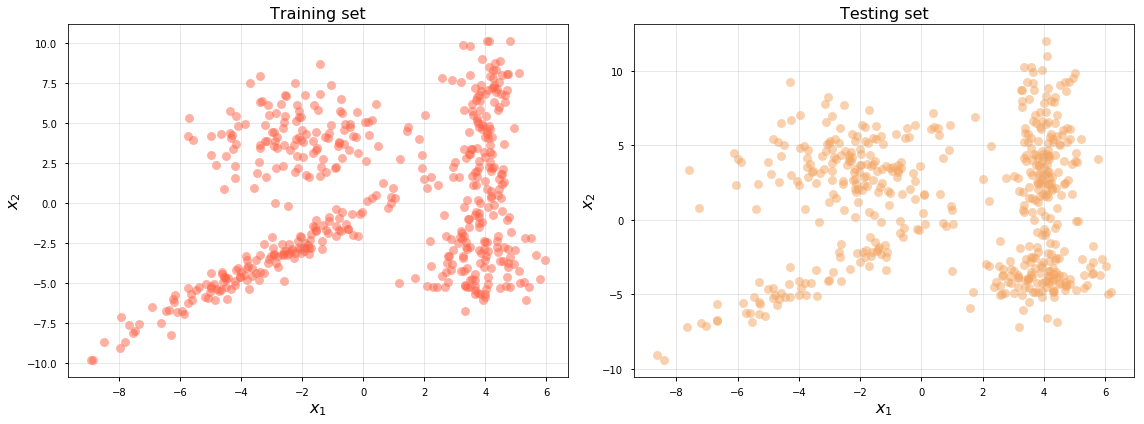

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].scatter(*train.T, color="tomato", **plot_kwds)
ax[0].grid(alpha=0.3)
ax[0].set_xlabel(r"$x_{1}$", size=16)
ax[0].set_ylabel(r"$x_{2}$", size=16)
ax[0].set_title("Training set", size=16)


ax[1].scatter(*test.T, color = "sandybrown", **plot_kwds)
ax[1].grid(alpha=0.3)
ax[1].set_xlabel(r"$x_{1}$", size=16)
ax[1].set_ylabel(r"$x_{2}$", size=16)
ax[1].set_title("Testing set", size=16)

plt.tight_layout()

## EM on HMM

In [5]:
hmm = myHMM(k=4, initialization="kmeans")

In [6]:
hmm.fit(train)

utils/myhmm.py:82: RuntimeWarning: divide by zero encountered in log
  alpha[0] = np.log(self.pi0_) + np.log(self.N_[0])


In [7]:
hmm.compute_expectation_()

-1.6286554633010724

In [8]:
labels_viterbi = hmm.viterbi(train)

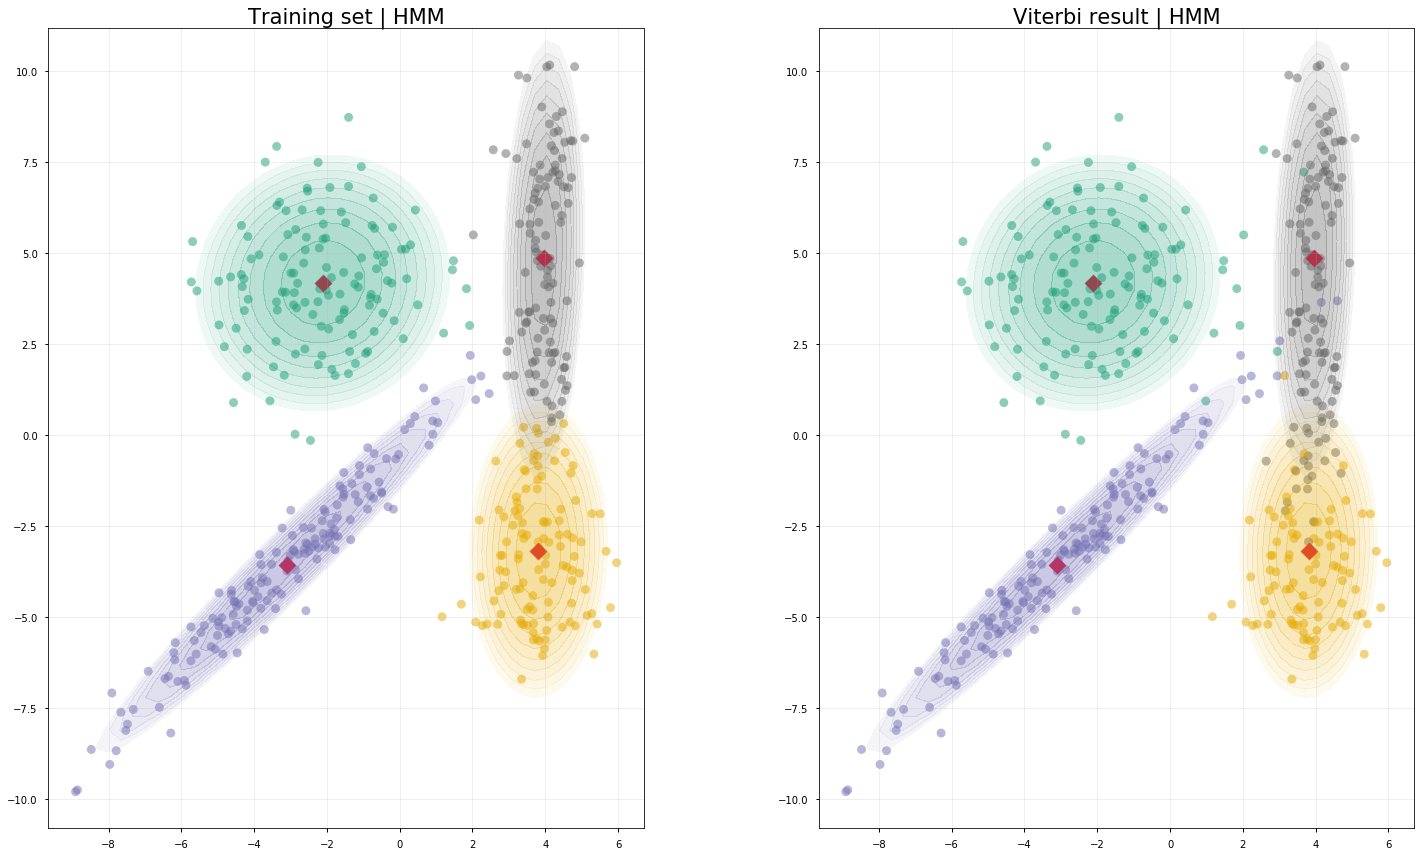

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(22, 12)) 

title = "Training set | HMM"
hmm.plot_pred(X=train,
                 labels=hmm.labels_,
                 title=title,
                 plot_kwds=plot_kwds,
                 ax=ax[0])
ax[0].set_aspect('equal')

title = "Viterbi result | HMM"
hmm.plot_pred(X=train,
                 labels=labels_viterbi,
                 title=title,
                 plot_kwds=plot_kwds,
                 ax=ax[1])
ax[1].set_aspect('equal')
plt.tight_layout()

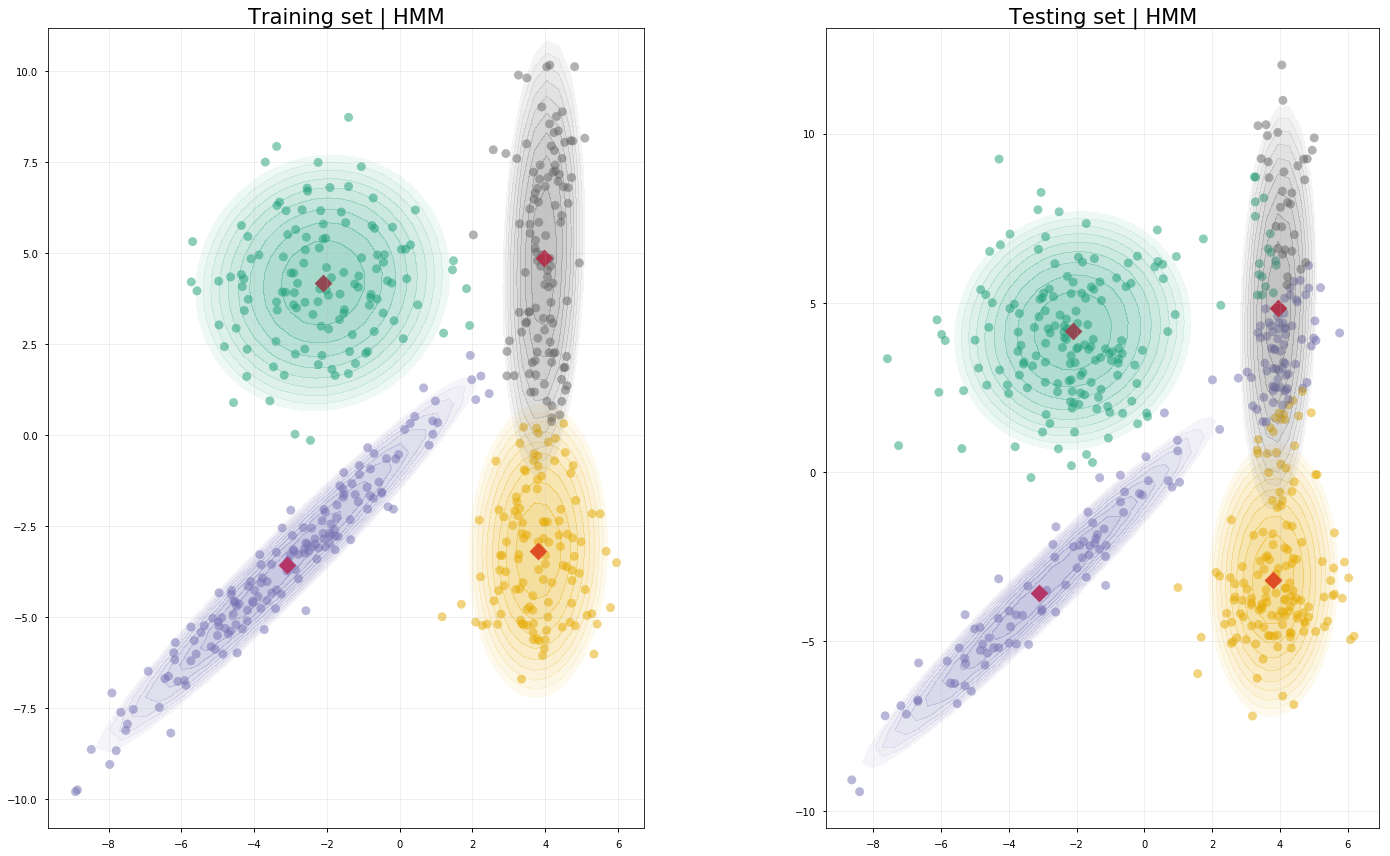

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(22, 12)) 

title = "Training set | HMM"
hmm.plot_pred(X=train,
                 labels=hmm.labels_,
                 title=title,
                 plot_kwds=plot_kwds,
                 ax=ax[0])
ax[0].set_aspect('equal')

test_labels = hmm.predict(test)
title = "Testing set | HMM"
hmm.plot_pred(X=test,
                 labels=test_labels, 
                 title=title,
                 plot_kwds=plot_kwds,
                 ax=ax[1])
ax[1].set_aspect('equal')
plt.tight_layout()

In [11]:
hmm.compute_expectation_()

-1.6286554633010724